# Data Wrangling

Data wrangling is the process of cleaning, transforming, and preparing raw data for analysis. This involves handling missing values, correcting data types, removing duplicates, and restructuring data.

## Steps:
1. Gathering data
2. Tools to clean data
3. How to do


In [169]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [170]:
df = sns.load_dataset('titanic')

In [171]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [172]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [174]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [175]:
df.drop(columns="deck", inplace=True)

In [176]:
df['age'] = df['age'].fillna(df['age'].mean())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

In [177]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

# Outliers removal

### visualization method

<Axes: xlabel='sex', ylabel='age'>

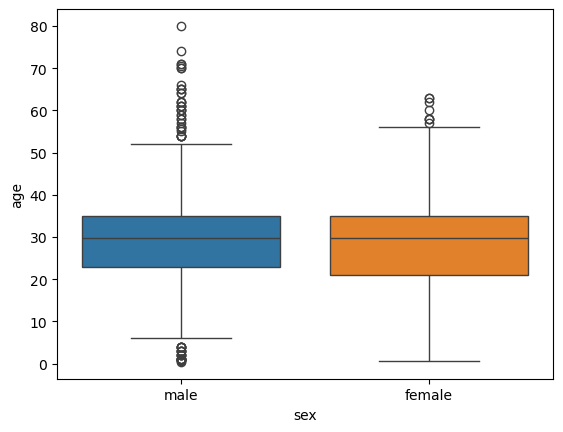

In [178]:
sns.boxplot(data=df, y='age', x="sex", hue="sex")

In [179]:
# IQR method
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
print(f"Outliers in age column is: {IQR}")

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

Outliers in age column is: 13.0


In [180]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
print(f"Outliers in fare column is: {IQR}")

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)]

Outliers in fare column is: 22.174999999999997


In [181]:
df.shape

(718, 14)

<Axes: xlabel='age', ylabel='Count'>

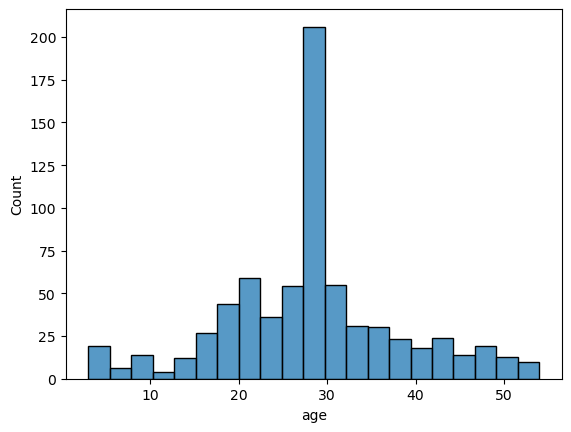

In [182]:
sns.histplot(df['age'])

In [183]:
# Z-score method
zscore = np.abs(stats.zscore(df['age']))
threshold = 3
df = df[(zscore < threshold)]

## Finding and Dropping duplicates

In [184]:
df.shape

(718, 14)

In [185]:
# find duplicates
df.duplicated().sum()


np.int64(103)

In [186]:
df_duplicates = df[df.duplicated()]
df_duplicates.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
47,1,3,female,29.699118,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
76,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,Southampton,no,True
77,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
87,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
95,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True


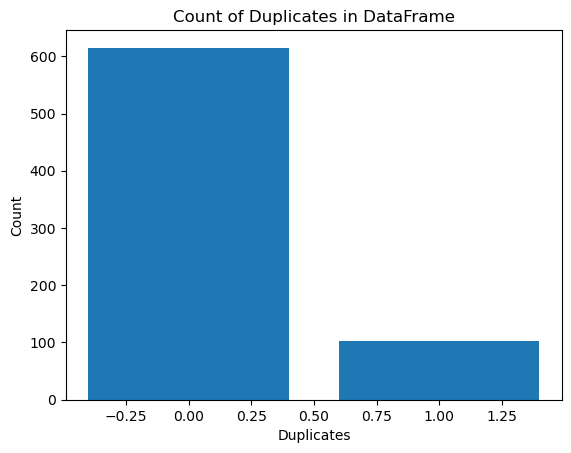

In [187]:
df_duplicates = df.duplicated()
df_duplicates_count = df_duplicates.value_counts()

plt.bar(df_duplicates_count.index, df_duplicates_count.values)
plt.xlabel('Duplicates')
plt.ylabel('Count')
plt.title('Count of Duplicates in DataFrame')
plt.show()

In [188]:
# finding and dropping duplicates
df.drop_duplicates(inplace=True)

In [189]:
df.shape

(615, 14)

# Data Normalization

## MinMaxScaler

In [190]:
# 1. import libraries
from sklearn.preprocessing import MinMaxScaler

#2.data
df


#3. select columns to normalize
cols_to_normalize = ['age','fare']

# 4. create the scaler function/tool
scaler = MinMaxScaler()

# 5. fit and transform the data on scaler or vice versa
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# 6. check the data
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,0.372549,1,0,0.118118,S,Third,man,True,Southampton,no,False
2,1,3,female,0.450980,0,0,0.129115,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.627451,1,0,0.865114,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.627451,0,0,0.131152,S,Third,man,True,Southampton,no,True
5,0,3,male,0.523512,0,0,0.137804,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.705882,0,5,0.474509,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,0.313725,0,0,0.488765,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.523512,1,2,0.382051,S,Third,woman,False,Southampton,no,False
889,1,1,male,0.450980,0,0,0.488765,C,First,man,True,Cherbourg,yes,True


In [132]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,0.360976,2.469919,0.497584,0.460163,0.365854,0.298831
std,0.480674,0.741063,0.209485,0.894039,0.835572,0.221334
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.372549,0.000000,0.000000,0.128640
50%,0.000000,3.000000,0.523512,0.000000,0.000000,0.211798
75%,1.000000,3.000000,0.607843,1.000000,0.000000,0.423596
max,1.000000,3.000000,1.000000,5.000000,6.000000,1.000000


## Standard Scaler

In [133]:
from sklearn.preprocessing import StandardScaler

#2.data
df


#3. select columns to normalize
cols_to_normalize = ['age','fare']

# 4. create the scaler function/tool
scaler = StandardScaler()

# 5. fit and transform the data on scaler or vice versa
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# 6. check the data
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,-0.597354,1,0,-0.817136,S,Third,man,True,Southampton,no,False
2,1,3,female,-0.222648,0,0,-0.767410,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.620441,1,0,2.560585,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.620441,0,0,-0.758201,S,Third,man,True,Southampton,no,True
5,0,3,male,0.123872,0,0,-0.728122,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.995147,0,5,0.794372,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,-0.878384,0,0,0.858832,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.123872,1,2,0.376301,S,Third,woman,False,Southampton,no,False
889,1,1,male,-0.222648,0,0,0.858832,C,First,man,True,Cherbourg,yes,True


In [134]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,615.000000,615.000000,6.150000e+02,615.000000,615.000000,6.150000e+02
mean,0.360976,2.469919,3.061688e-16,0.460163,0.365854,-1.213122e-16
std,0.480674,0.741063,1.000814e+00,0.894039,0.835572,1.000814e+00
min,0.000000,1.000000,-2.377209e+00,0.000000,0.000000,-1.351236e+00
25%,0.000000,2.000000,-5.973545e-01,0.000000,0.000000,-7.695610e-01
50%,0.000000,3.000000,1.238725e-01,0.000000,0.000000,-3.935399e-01
75%,1.000000,3.000000,5.267644e-01,1.000000,0.000000,5.641565e-01
max,1.000000,3.000000,2.400296e+00,5.000000,6.000000,3.170505e+00


## Log transformation

In [150]:
titanic = sns.load_dataset('titanic')

In [151]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [152]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [155]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['fare'] = titanic['fare'].fillna(titanic['fare'].median())

# log transform
titanic['age'] = np.log(titanic['age'])
titanic['fare'] = np.log(titanic['fare'])
titanic.head()

c:\Users\Kamran\miniconda3\envs\ml_env\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,0.120897,1,0,-0.291973,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,0.255665,1,0,0.374381,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,0.166483,0,0,-0.244138,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,0.237798,1,0,0.324978,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,0.237798,0,0,-0.236085,S,Third,man,True,NaN,Southampton,no,True


In [156]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,874.000000,891.000000,891.000000,876.000000
mean,0.383838,2.308642,0.141742,0.523008,0.381594,0.027736
std,0.486592,0.836071,0.281429,1.102743,0.806057,0.256244
min,0.000000,1.000000,-2.363952,0.000000,0.000000,-0.739327
25%,0.000000,2.000000,0.133470,0.000000,0.000000,-0.244138
50%,0.000000,3.000000,0.185345,0.000000,0.000000,0.008230
75%,1.000000,3.000000,0.237798,1.000000,0.000000,0.219450
max,1.000000,3.000000,0.390359,8.000000,6.000000,0.604932


<Axes: xlabel='sex', ylabel='fare'>

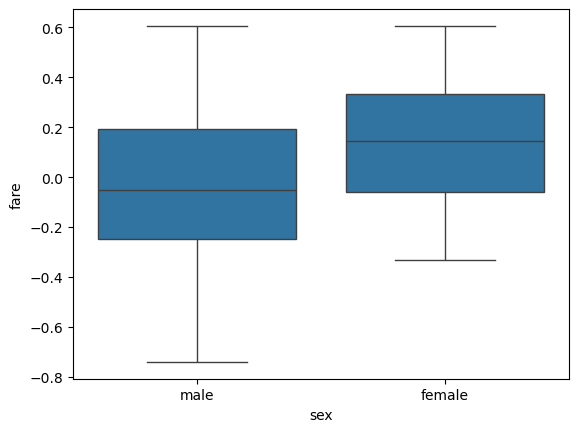

In [157]:
sns.boxplot(data=titanic, x="sex", y="fare")

<Axes: xlabel='age', ylabel='Count'>

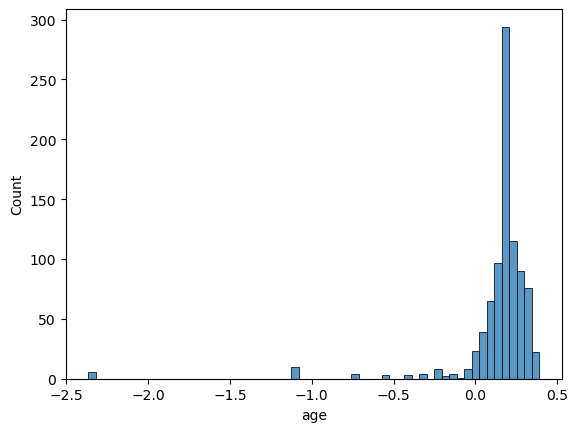

In [158]:
sns.histplot(titanic['age'])

In [159]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

## organization the data

In [191]:
df["family_size"] = df["sibsp"] + df["parch"]

<Axes: xlabel='family_size', ylabel='Count'>

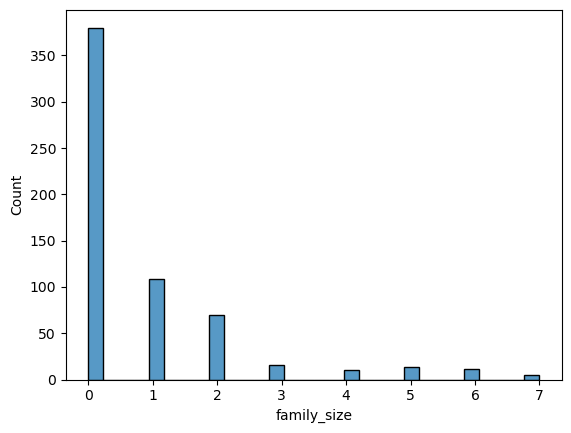

In [192]:
sns.histplot(df["family_size"])

c:\Users\Kamran\miniconda3\envs\ml_env\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='sex', ylabel='age'>

c:\Users\Kamran\miniconda3\envs\ml_env\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Kamran\miniconda3\envs\ml_env\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


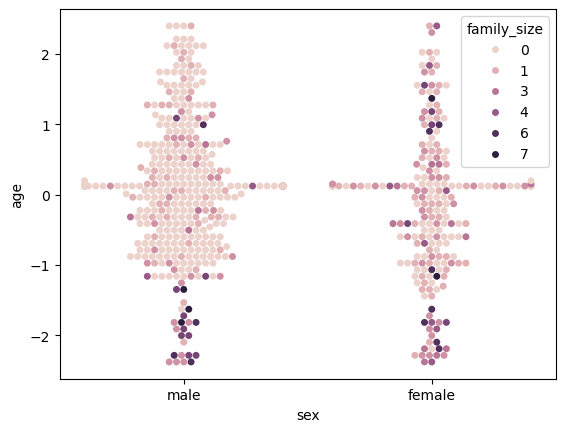

In [162]:
sns.swarmplot(data=df, y="age", x="sex", hue="family_size")

In [164]:
df = df.rename(columns={'survived': 'survival'})
df.columns

Index(['survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

In [165]:
table = pd.pivot_table(df, values='fare',index='pclass',
       columns= "survival", aggfunc=np.sum)

table

C:\Users\Kamran\AppData\Local\Temp\ipykernel_12048\1767773998.py:1: FutureWarning: The provided callable <function sum at 0x0000020445FEFEC0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = pd.pivot_table(df, values='fare',index='pclass',


survival,0,1
pclass,,
1,47.098956,86.811732
2,-1.053066,13.921025
3,-109.690971,-37.087677


<Axes: xlabel='fare', ylabel='age'>

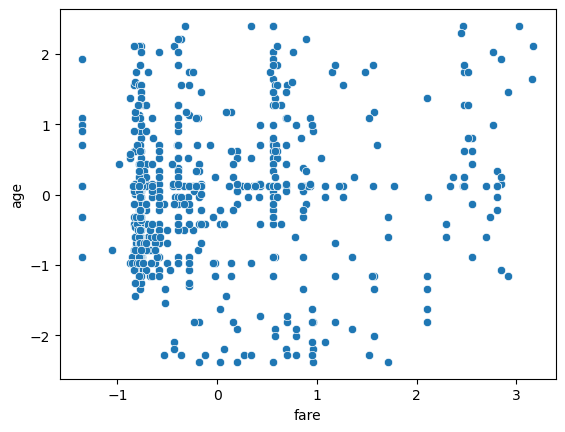

In [167]:
sns.scatterplot(data=df, x = "fare", y="age")

# saving the wrngled data

In [193]:
df.to_csv("preprocessed_data.csv")